**Question 1**

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('/Oakland.png')
image_array = np.array(image)

#R, G, B
r_channel = image_array[:,:,0]
g_channel = image_array[:,:,1]
b_channel =  image_array[:,:,2]

r_channel, g_channel, b_channel


(array([[154, 156, 152, ..., 165, 165, 172],
        [145, 148, 157, ..., 158, 147, 147],
        [156, 149, 164, ..., 139, 137, 151],
        ...,
        [195, 190, 192, ..., 205, 212, 213],
        [188, 186, 188, ..., 212, 217, 203],
        [193, 189, 191, ..., 218, 216, 205]], dtype=uint8),
 array([[187, 186, 191, ..., 179, 180, 188],
        [188, 186, 185, ..., 191, 174, 175],
        [186, 187, 185, ..., 149, 167, 182],
        ...,
        [200, 198, 195, ..., 208, 217, 217],
        [199, 201, 198, ..., 215, 217, 207],
        [203, 206, 203, ..., 218, 212, 206]], dtype=uint8),
 array([[206, 210, 207, ..., 196, 199, 197],
        [202, 210, 201, ..., 203, 197, 196],
        [204, 210, 209, ..., 182, 201, 198],
        ...,
        [211, 209, 214, ..., 219, 220, 220],
        [209, 208, 211, ..., 220, 215, 214],
        [212, 210, 214, ..., 225, 224, 215]], dtype=uint8))

In [4]:
#c and d
r_min, r_max = r_channel.min(), r_channel.max()
g_min, g_max = g_channel.min(), g_channel.max()
b_min, b_max = b_channel.min(), b_channel.max()

r_min, r_max, g_min, g_max, b_min, b_max


(70, 222, 96, 230, 113, 231)

In [6]:
a = 0
b = 255

def contrast_stretch(channel, c, d):
    return (((channel - c) * ((b - a) / (d - c))) + a).astype(np.uint8)


r_stretched = contrast_stretch(r_channel, r_min, r_max)
g_stretched = contrast_stretch(g_channel, g_min, g_max)
b_stretched = contrast_stretch(b_channel, b_min, b_max)

r_stretched.min(), r_stretched.max(), g_stretched.min(), g_stretched.max(), b_stretched.min(), b_stretched.max()


(0, 255, 0, 255, 0, 255)

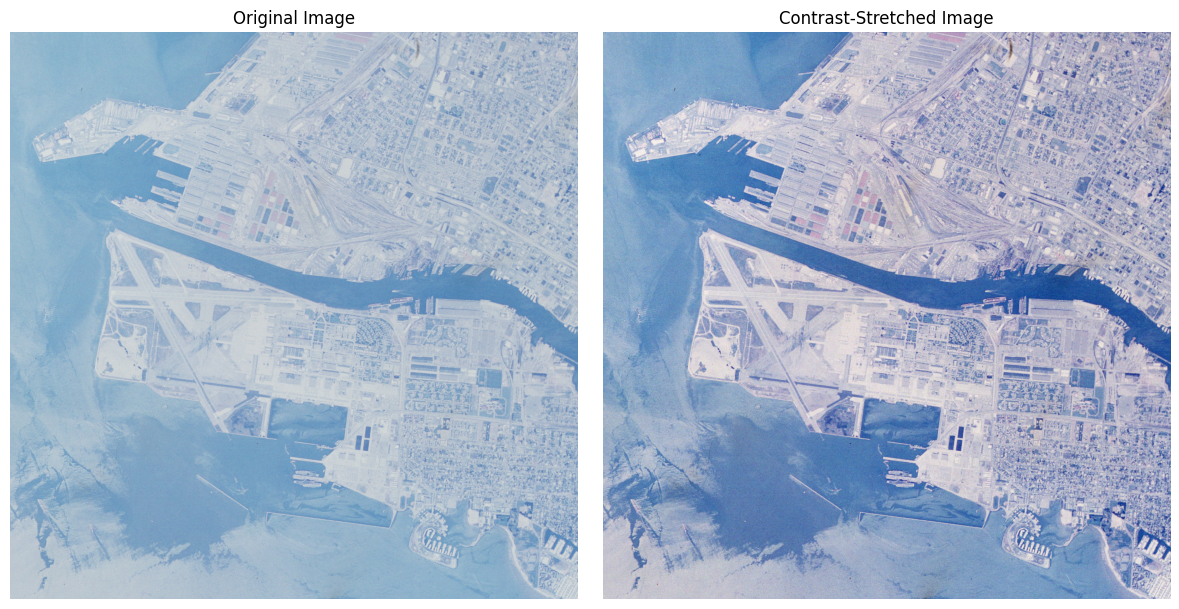

In [7]:

stretched_image_array = np.stack((r_stretched, g_stretched, b_stretched), axis=-1)


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image_array)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(stretched_image_array)
ax[1].set_title('Contrast-Stretched Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()



This method can lead to significant changes in the color balance of the image. While it can enhance the contrast of each channel to its maximum potential, it might introduce color shifts that weren't present in the original image. This might not always be desirable, especially if preserving the original color tone is essential.

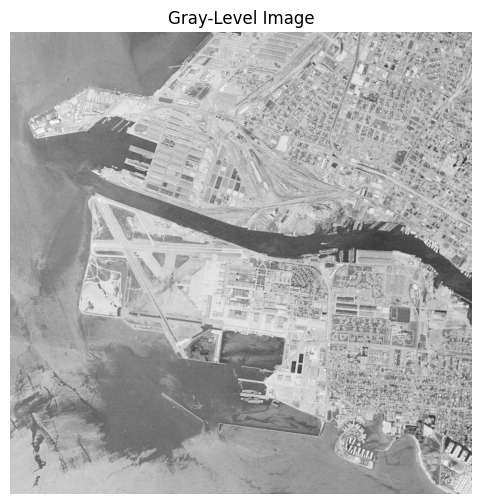

In [10]:
gray_image_array = (0.299 * r_channel + 0.587 * g_channel + 0.114 * b_channel).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(gray_image_array, cmap='gray')
plt.title('Gray-Level Image')
plt.axis('off')
plt.show()

Using a gray-scale conversion to determine the contrast stretch retains the color balance of the original image since the same stretching is applied to all channels. However, this method might not always yield the highest possible contrast since the gray-scale conversion might not capture the full dynamic range present across the RGB channels.

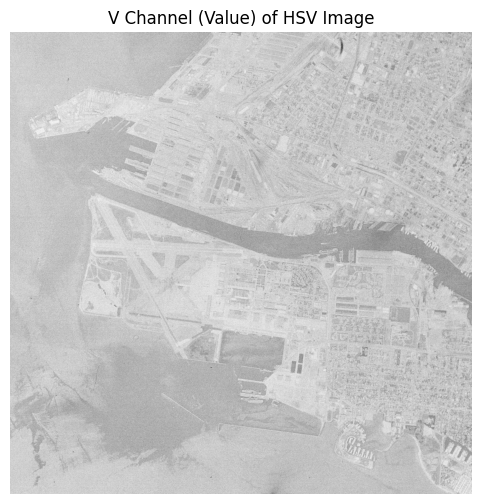

In [11]:
hsv_image_array = plt.cm.colors.rgb_to_hsv(image_array / 255.0)

v_channel = hsv_image_array[:,:,2]

plt.figure(figsize=(6, 6))
plt.imshow(v_channel, cmap='gray')
plt.title('V Channel (Value) of HSV Image')
plt.axis('off')
plt.show()

The V channel represents brightness, and basing the stretch on this channel can often yield good results in terms of contrast enhancement while retaining the original color balance. However, like the gray-level approach, it might not always capture the full contrast potential present in individual RGB channels.

If the primary goal is to maximize contrast, regardless of potential color shifts, then stretching each RGB channel individually might yield the "highest" contrast. But this comes at the cost of potentially altering the image's original color tones.

On the other hand, if preserving the original color balance is crucial, then basing the stretch on a single channel (like the gray-level or V channel) is more appropriate. Between the gray-level and HSV methods, the optimal choice might depend on the specific image and its characteristics. In some cases, the gray-level might yield better results, while in others, the V channel might be superior.

**Question 4**

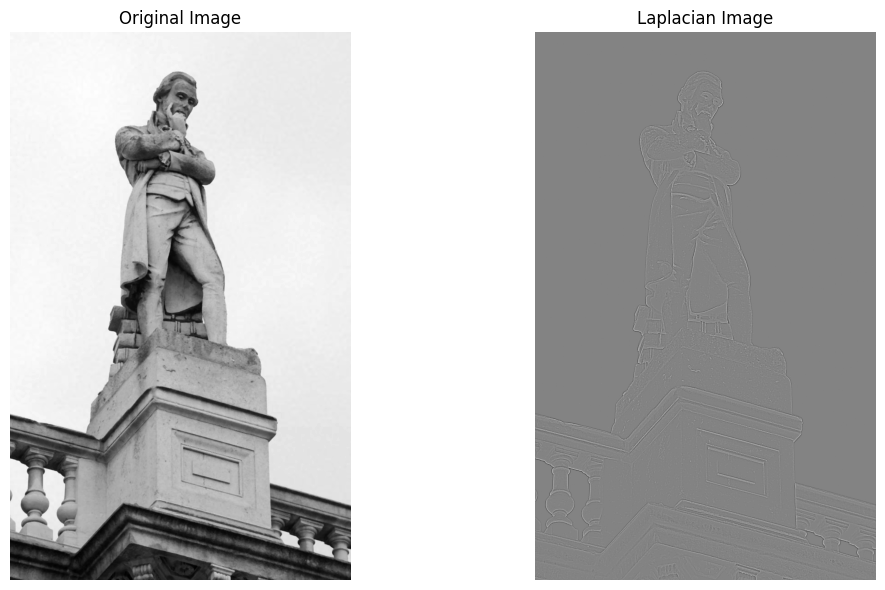

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d


laplace_image = Image.open('/content/Laplace.png').convert('L')
laplace_array = np.array(laplace_image)

laplacian_kernel = np.array([[1, 1, 1],
                             [1, -8, 1],
                             [1, 1, 1]])

laplacian_result = convolve2d(laplace_array, laplacian_kernel, mode='same', boundary='symm')

laplacian_normalized = laplacian_result - laplacian_result.min()
laplacian_normalized = (laplacian_normalized / laplacian_normalized.max() * 255).astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(laplace_array, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(laplacian_normalized, cmap='gray')
ax[1].set_title('Laplacian Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()
